**ZEOTAP DATA SCIENCE ASSESSMENT**

**TASK 1 : EXPLORATORY DATA ANALYSIS(EDA) AND BUSINESS INSIGHTS**

IMPORTING LIBARARIES AND DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], format='%d-%m-%Y', errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

BASIC DATA ANALYSIS

In [2]:
print("Customers Info:\n", customers.info())
print("\nProducts Info:\n", products.info())
print("\nTransactions Info:\n", transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
Customers Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB

Products Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns 

In [3]:
print("\nCustomers Summary:\n", customers.describe(include='all'))
print("\nProducts Summary:\n", products.describe(include='all'))
print("\nTransactions Summary:\n", transactions.describe(include='all'))


Customers Summary:
        CustomerID      CustomerName         Region SignupDate
count         200               200            200          0
unique        200               200              4          0
top         C0001  Lawrence Carroll  South America        NaN
freq            1                 1             59        NaN

Products Summary:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN

C:\Users\sushr\AppData\Local\Temp\ipykernel_21116\1720826942.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print("\nCustomers Summary:\n", customers.describe(include='all'))
C:\Users\sushr\AppData\Local\Temp\ipykernel_21116\1720826942.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print("\nTransactions Summary:\n", transactions.describe(include='all'))


In [4]:

print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())


Missing Values:
Customers: CustomerID        0
CustomerName      0
Region            0
SignupDate      200
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


UNIVARIATE ANALYSIS

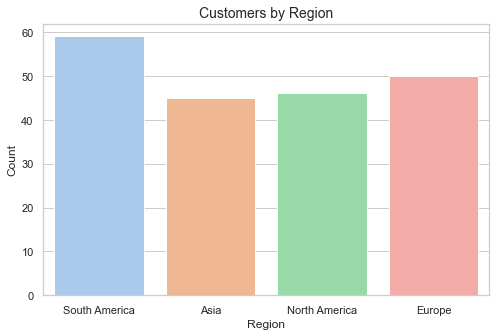

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='pastel')
plt.title('Customers by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

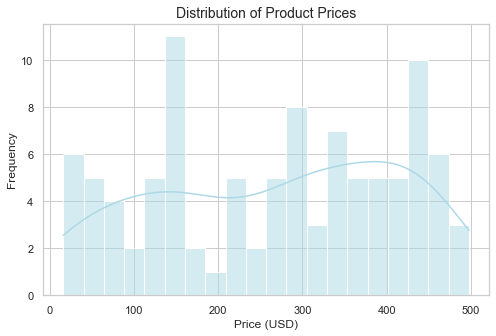

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=20, kde=True, color='lightblue')
plt.title('Distribution of Product Prices', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

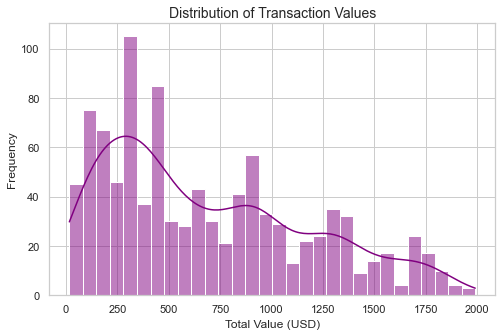

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='purple')
plt.title('Distribution of Transaction Values', fontsize=14)
plt.xlabel('Total Value (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

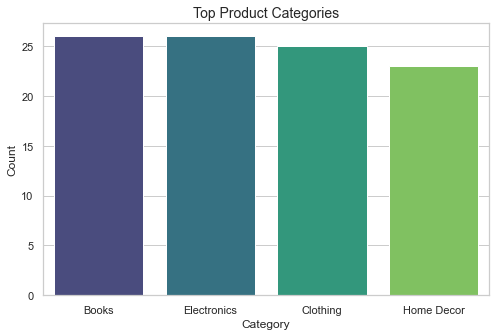

In [8]:
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Top Product Categories', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

BIVARIATE ANALYSIS

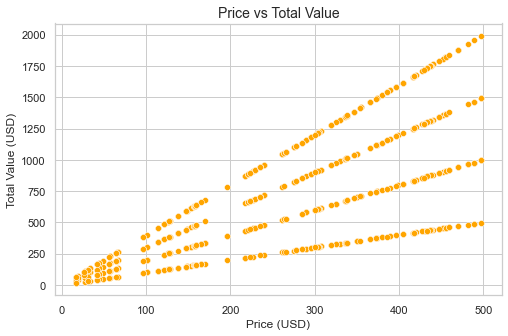

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions, x='Price', y='TotalValue', color='orange')
plt.title('Price vs Total Value', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.show()

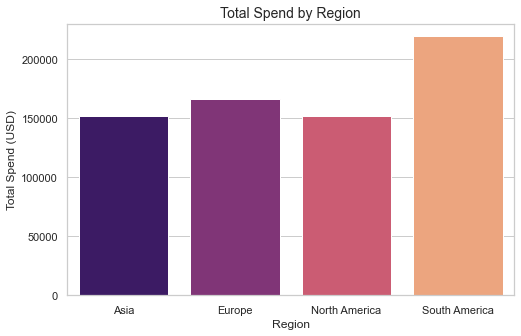

In [10]:
region_spend = transactions.merge(customers, on='CustomerID') \
                            .groupby('Region')['TotalValue'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=region_spend.index, y=region_spend.values, palette='magma')
plt.title('Total Spend by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Spend (USD)', fontsize=12)
plt.show()

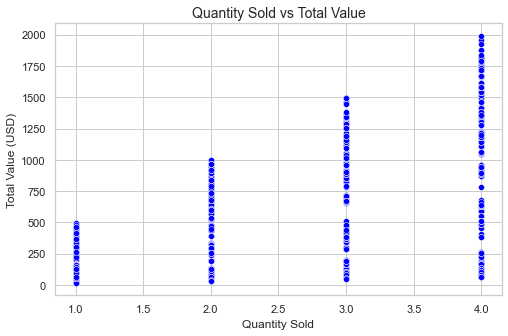

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions, x='Quantity', y='TotalValue', color='blue')
plt.title('Quantity Sold vs Total Value', fontsize=14)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.show()

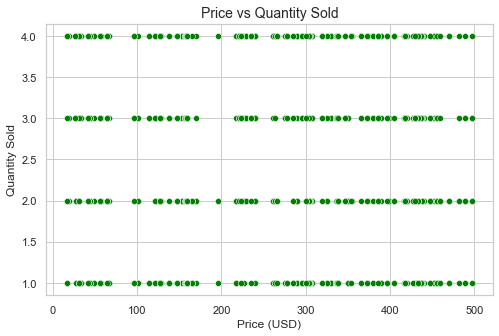

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions, x='Price', y='Quantity', color='green')
plt.title('Price vs Quantity Sold', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.show()

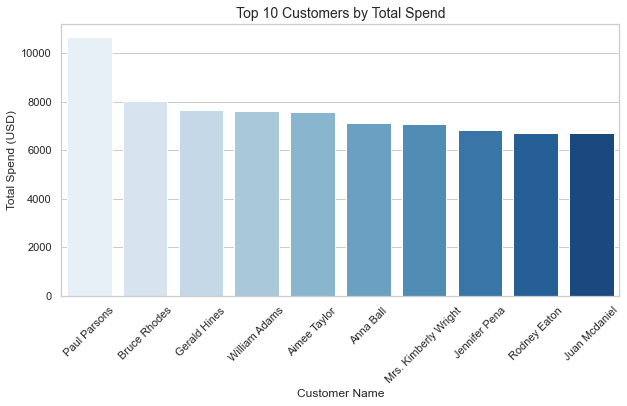

In [13]:
customer_spend = transactions.groupby('CustomerID')['TotalValue'].sum()
customer_spend = customer_spend.sort_values(ascending=False).head(10)

# Merge with customers DataFrame to get customer names
top_customers = customers[customers['CustomerID'].isin(customer_spend.index)]
customer_spend = customer_spend.reset_index().merge(top_customers[['CustomerID', 'CustomerName']], on='CustomerID')

plt.figure(figsize=(10, 5))
sns.barplot(x='CustomerName', y='TotalValue', data=customer_spend, palette='Blues')
plt.title('Top 10 Customers by Total Spend', fontsize=14)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Spend (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

MULTIVARIATE ANALYSIS

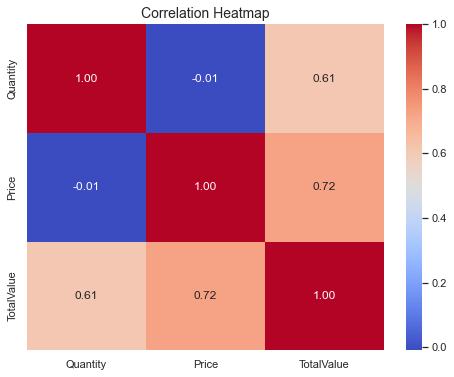

In [14]:
correlation_matrix = transactions[['Quantity', 'Price', 'TotalValue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

In [15]:
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spend per customer
    'TransactionID': 'count'  # Total number of transactions per customer
}).reset_index()

region_data = customer_transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID')

region_data = region_data.groupby('Region').agg({
    'TotalValue': 'sum',  # Total Spend by Region
    'TransactionID': 'sum'  
}).reset_index()

region_data = region_data.rename(columns={
    'TotalValue': 'TotalSpent',
    'TransactionID': 'TotalTransactions'
})

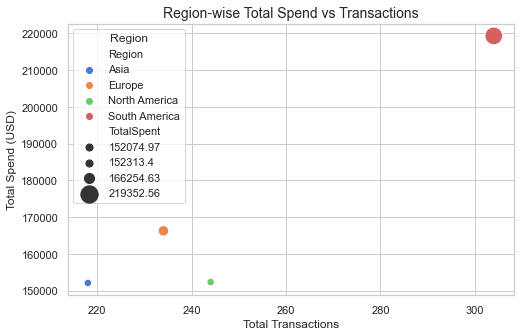

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=region_data, x='TotalTransactions', y='TotalSpent', hue='Region', size='TotalSpent', sizes=(50, 300), palette='muted')
plt.title('Region-wise Total Spend vs Transactions', fontsize=14)
plt.xlabel('Total Transactions', fontsize=12)
plt.ylabel('Total Spend (USD)', fontsize=12)
plt.legend(title='Region')
plt.show()

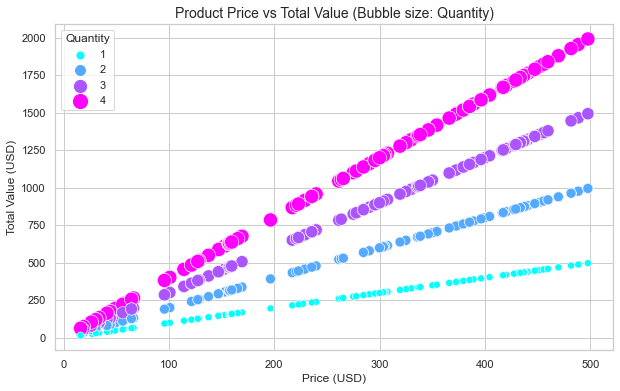

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions, x='Price', y='TotalValue', size='Quantity', hue='Quantity', palette='cool', sizes=(50, 200))
plt.title('Product Price vs Total Value (Bubble size: Quantity)', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.show()

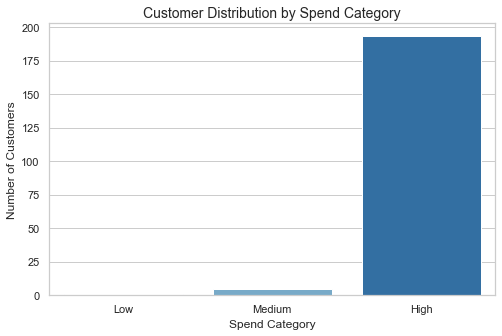

In [18]:
customer_spend = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()

customers = customers.merge(customer_spend, on='CustomerID', how='left')

spend_categories = ['Low', 'Medium', 'High']
spend_bins = [0, 100, 500, float('inf')]  
customers['SpendCategory'] = pd.cut(customers['TotalValue'], bins=spend_bins, labels=spend_categories)

plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='SpendCategory', palette='Blues')
plt.title('Customer Distribution by Spend Category', fontsize=14)
plt.xlabel('Spend Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

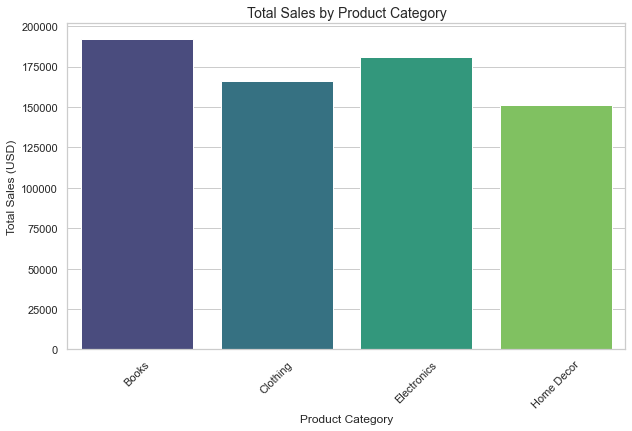

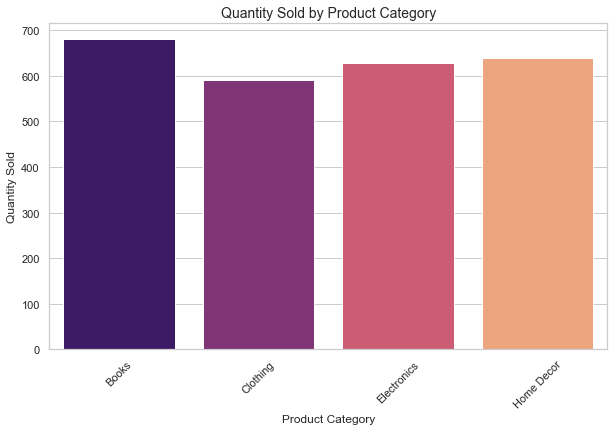

In [19]:
category_sales = transactions.merge(products[['ProductID', 'Category']], on='ProductID') \
                             .groupby('Category').agg({
                                 'TotalValue': 'sum', 
                                 'Quantity': 'sum'
                             }).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Category', y='TotalValue', palette='viridis')
plt.title('Total Sales by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Category', y='Quantity', palette='magma')
plt.title('Quantity Sold by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.show()

METRICS AND PERFORMANCE

In [26]:
# Calculate Total Spend for each customer by summing TotalValue in transactions
customer_spend = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spend.rename(columns={'TotalValue': 'TotalSpent'}, inplace=True)

# Calculate Total Transactions for each customer
total_transactions = transactions.groupby('CustomerID').size().reset_index(name='TotalTransactions')

# Merge the TotalSpent and TotalTransactions data back to the customers DataFrame
customers = customers.merge(customer_spend, on='CustomerID', how='left')
customers = customers.merge(total_transactions, on='CustomerID', how='left')

# Clean up the duplicate columns
customers['TotalSpent'] = customers['TotalSpent_y']
customers['TotalTransactions'] = customers['TotalTransactions_y']

# Drop the unnecessary columns after merge
customers.drop(columns=['TotalSpent_x', 'TotalTransactions_x', 'TotalSpent_y', 'TotalTransactions_y'], inplace=True)

# Customer Lifetime Value (CLV)
customers['CLV'] = customers['TotalSpent'] / customers['TotalTransactions']
customers['CLV'].fillna(0, inplace=True)  # Fill NaN values with 0 for customers with no transactions

# Average Basket Size (Average quantity purchased per transaction)
basket_size = transactions.groupby('CustomerID')['Quantity'].mean()  # Get the average quantity for each customer
customers_transactions = pd.merge(customers, basket_size, on='CustomerID', how='left').rename(columns={'Quantity': 'AvgBasketSize'})

# Show the customer segmentation metrics
print("Customer Segmentation Metrics:\n", customers_transactions[['CustomerID', 'CLV', 'AvgBasketSize']].head())


Customer Segmentation Metrics:
   CustomerID      CLV  AvgBasketSize
0      C0001  670.904       2.400000
1      C0002  465.685       2.500000
2      C0003  681.345       3.500000
3      C0004  669.360       2.875000
4      C0005  678.080       2.333333


No valid signup data available for plotting.


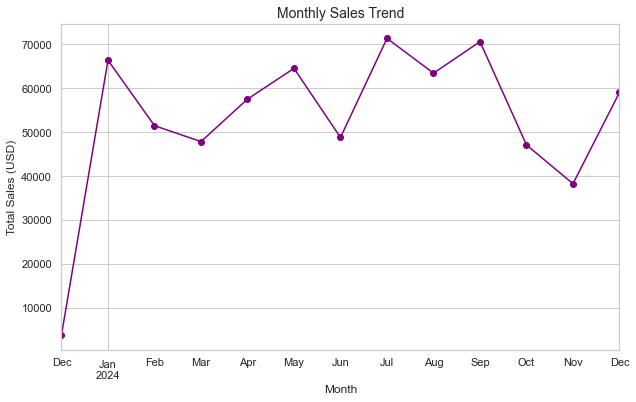

In [27]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')

customers = customers.dropna(subset=['SignupDate'])

signup_trend = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()

if not signup_trend.empty:
    plt.figure(figsize=(10, 6))
    signup_trend.plot(kind='line', marker='o', color='teal')
    plt.title('Customer Signup Trend Over Time', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Signups', fontsize=12)
    plt.show()
else:
    print("No valid signup data available for plotting.")

transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('TransactionMonth')['TotalValue'].sum()

if not monthly_sales.empty:
    plt.figure(figsize=(10, 6))
    monthly_sales.plot(kind='line', marker='o', color='purple')
    plt.title('Monthly Sales Trend', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Sales (USD)', fontsize=12)
    plt.show()
else:
    print("No valid sales data available for plotting.")

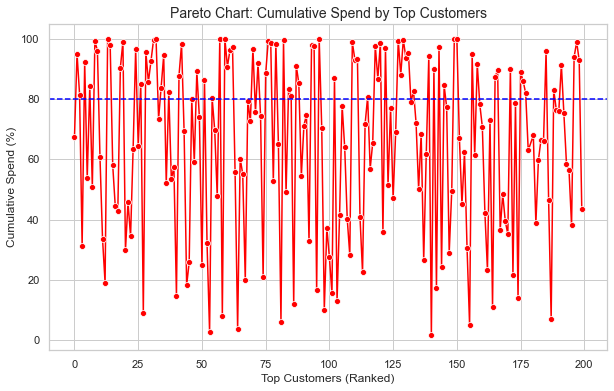

In [28]:
pareto_customers = customers_transactions.sort_values('TotalSpent', ascending=False)
pareto_customers['CumulativeSpend'] = pareto_customers['TotalSpent'].cumsum()
pareto_customers['CumulativePercent'] = pareto_customers['CumulativeSpend'] / pareto_customers['TotalSpent'].sum() * 100

plt.figure(figsize=(10, 6))
sns.lineplot(data=pareto_customers, x=pareto_customers.index, y='CumulativePercent', marker='o', color='red')
plt.axhline(80, color='blue', linestyle='--')
plt.title('Pareto Chart: Cumulative Spend by Top Customers', fontsize=14)
plt.xlabel('Top Customers (Ranked)', fontsize=12)
plt.ylabel('Cumulative Spend (%)', fontsize=12)
plt.show()

TotalSpent           0
TotalTransactions    0
CLV                  0
AvgBasketSize        0
dtype: int64
TotalSpent           0
TotalTransactions    0
CLV                  0
AvgBasketSize        0
dtype: int64
Cluster Centers:
[[-0.8229288  -0.13473874 -1.3192601  -1.34567536]
 [ 1.21890419  1.16165503  0.32011869  0.26375679]
 [ 0.15726797 -0.5896856   1.33574019  1.15363459]
 [-0.51974562 -0.48069833 -0.17853728 -0.04490392]]


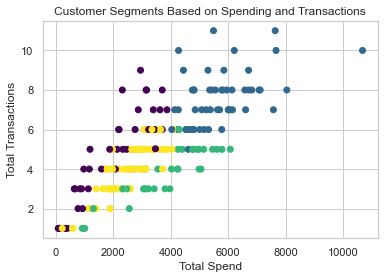

          TotalSpent              TotalTransactions                    CLV  \
                mean          std              mean       std         mean   
Cluster                                                                      
0        1966.710659  1215.247497          4.730409  2.317275   365.329427   
1        5689.975849  1220.501641          7.566038  1.379931   761.502276   
2        3754.091176  1406.478455          3.735294  1.309842  1006.937721   
3        2519.562632   839.898779          3.973684  1.275133   640.996899   

                    AvgBasketSize            
                std          mean       std  
Cluster                                      
0        141.179068      1.778782  0.363487  
1        137.070832      2.678193  0.342566  
2        174.602556      3.175490  0.393577  
3        127.398562      2.505702  0.369399  


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
print(customers_transactions[['TotalSpent', 'TotalTransactions', 'CLV', 'AvgBasketSize']].isna().sum())

import numpy as np
print((customers_transactions[['TotalSpent', 'TotalTransactions', 'CLV', 'AvgBasketSize']] == np.inf).sum())

customers_transactions[['TotalSpent', 'TotalTransactions', 'CLV', 'AvgBasketSize']] = customers_transactions[['TotalSpent', 'TotalTransactions', 'CLV', 'AvgBasketSize']].fillna(customers_transactions[['TotalSpent', 'TotalTransactions', 'CLV', 'AvgBasketSize']].mean())

customers_transactions[['TotalSpent', 'TotalTransactions', 'CLV', 'AvgBasketSize']] = customers_transactions[['TotalSpent', 'TotalTransactions', 'CLV', 'AvgBasketSize']].replace([np.inf, -np.inf], np.nan)
customers_transactions[['TotalSpent', 'TotalTransactions', 'CLV', 'AvgBasketSize']] = customers_transactions[['TotalSpent', 'TotalTransactions', 'CLV', 'AvgBasketSize']].fillna(customers_transactions[['TotalSpent', 'TotalTransactions', 'CLV', 'AvgBasketSize']].mean())

features = customers_transactions[['TotalSpent', 'TotalTransactions', 'CLV', 'AvgBasketSize']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
customers_transactions['Cluster'] = kmeans.fit_predict(scaled_features)

print("Cluster Centers:")
print(kmeans.cluster_centers_)

plt.scatter(customers_transactions['TotalSpent'], customers_transactions['TotalTransactions'], c=customers_transactions['Cluster'], cmap='viridis')
plt.xlabel('Total Spend')
plt.ylabel('Total Transactions')
plt.title('Customer Segments Based on Spending and Transactions')
plt.show()

print(customers_transactions.groupby('Cluster').agg({
    'TotalSpent': ['mean', 'std'],
    'TotalTransactions': ['mean', 'std'],
    'CLV': ['mean', 'std'],
    'AvgBasketSize': ['mean', 'std']
}))